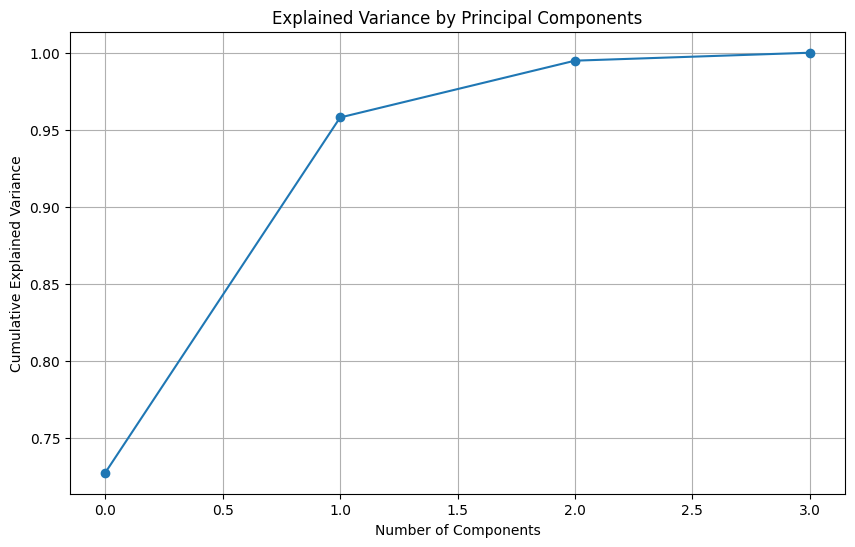

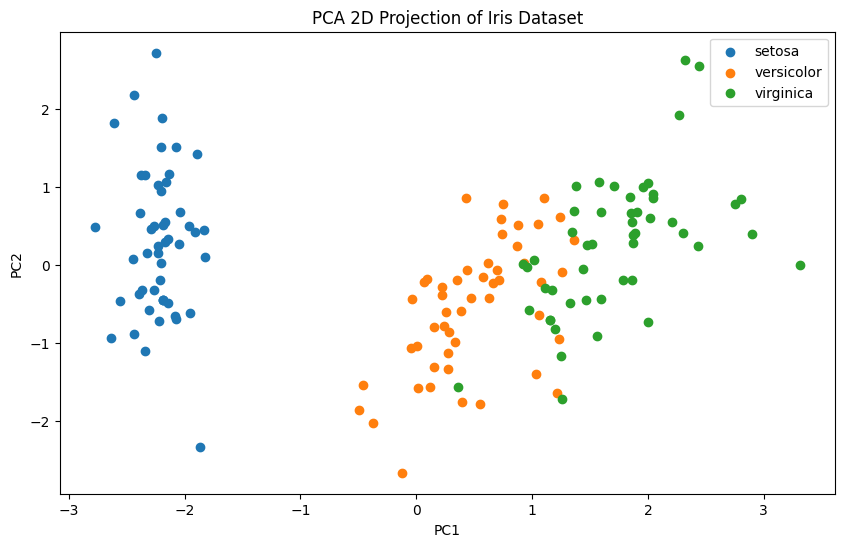

,PC1,PC2,PC3,PC4
sepal_length,0.522372,0.372318,0.721017,-0.261996
sepal_width,-0.263355,0.925556,-0.242033,0.124135
petal_length,0.581254,0.021095,-0.140892,0.801154
petal_width,0.565611,0.065416,-0.633801,-0.523546


In [3]:
# ==========================
# PCA TUTORIAL – GOOGLE COLAB
# Using Iris Dataset (Online CSV)
# ==========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---------------------------------------
# 1. Load dataset online (WORKING LINK)
# ---------------------------------------
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

df.head()

# ---------------------------------------
# 2. Separate features and target
# ---------------------------------------
X = df.drop("species", axis=1)
y = df["species"]

# ---------------------------------------
# 3. Standardize the features
# ---------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------
# 4. Apply PCA (all components)
# ---------------------------------------
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# ---------------------------------------
# 5. Explained variance plot
# ---------------------------------------
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()

# ---------------------------------------
# 6. PCA 2D Projection
# ---------------------------------------
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
for species in y.unique():
    plt.scatter(
        X_pca2[y==species, 0],
        X_pca2[y==species, 1],
        label=species
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection of Iris Dataset")
plt.legend()
plt.show()

# ---------------------------------------
# 7. PCA Loadings (Component weights)
# ---------------------------------------
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

loadings
